# Momento de Retroalimentación: Módulo 2 Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución. (Portafolio Implementación)

Por Juan Pablo Bernal Lafarga - A01742342

### 1. Crea un espacio dentro del repositorio de GitHub que creaste para el portafolio de implementación (por ejemplo, una carpeta para el módulo de ML con una subcarpeta para este entregable).

https://github.com/JPBL101203/TC3006C_A01742342/tree/main/Portafolio_Implementacion/Machine_Learning_Imp

### 2. Selecciona cualquiera de los Challenge vistos en clase y programa un algoritmo que permita resolver el problema. Dicho algoritmo debe ser uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) haciendo uso de Scikit-learn. Lo que se busca es que demuestres tu conocimiento sobre el framework y como configurar el algoritmo.

He seleccionado el Week02_Challenge1 que dice:

  - Adapte el código de la regresión lineal desarrollado en clase para que el modelo entrenado corresponda con una regresión logística. Posteriormente, implemente un clasificador que estime si un estudiante aprueba o no el curso:

        ‡ Considerando solamente la columna ‘Attendance’

        ‡ Considerando solamente la columna ‘Homework’

      † Calcule las métricas de desempeño. ¿Cuál es mejor? ¿Le ganan a la referencia?

### 3. Divide el set de datos del problema en dos subconjuntos, uno para entrenamiento y otro para prueba. Entrena tu modelo sobre el primer subconjunto, y por un mínimo de 100 iteraciones. Selecciona valores para la tasa de aprendizaje y para los parámetros iniciales, según tu criterio.

Dado que el problema plantea 2 variables independientes, se tendrán los siguientes subconjuntos de entrenamiento y prueba:

In [33]:
import pandas as pd
import numpy as np

x = pd.DataFrame()
y = pd.DataFrame()
x['Attendance'], x['Homework'] = [80, 65, 95, 95, 85, 75, 90, 65], [75, 70, 85, 100, 65, 55, 90, 80]
y['Pass'] = [1, 0, 1, 1, 0, 0, 1, 1]

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Se optó por una distribución de 75%-25% para los subconjuntos de entrenamiento y prueba respectivamente, ya que solo se cuenta con 8 observaciones. De esta manera el entrenamiento de se lleva a cabo con 6 datos y la prueba para predecir los otros 2 datos.

Para dicha partición de los datos se utilizó la función 'train_test_split', la cual crea 4 variables, una variable de entrenamiento y una de prueba para la variable independiente, y una variable de entrenamiento y una de prueba para la variable dependiente. La proporción de la partición de los datos se da de acuerdo al parámetro 'test_size', que define el porcentaje de los datos que se irán a las variables de prueba.

In [35]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística para 'Attendance'
model = LogisticRegression() # Tiene un máximo de 100 iteraciones por default

# Ajustar el modelo con los datos de entrenamiento para 'Attendance'
model.fit(np.array(X_train['Attendance']).reshape(-1,1), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [36]:
# Crear el modelo de regresión logística para 'Homework'
model2 = LogisticRegression() # Tiene un máximo de 100 iteraciones por default

# Ajustar el modelo con los datos de entrenamiento para 'Homework'
model2.fit(np.array(X_train['Homework']).reshape(-1,1), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Se crearon y ajustaron los modelos de regresión logística para las variables independientes 'Attendance' y 'Homework' con la función 'LogisticRegression' de Scikit-learn, la cual es una implementación del algoritmo de regresión logística, que es un modelo de clasificación utilizado para predecir una variable de salida binaria (como 0 o 1, verdadero o falso) en función de una o más variables de entrada.

En el bloque superior se muestra una función que crea y ajusta los modelos de regresión logística, con atributos que nos permiten conocer los valores de $\theta$ para cada modelo.

Como hiperparámetros utiliza por defecto la penalización 'l2' con una constante de regularización inversa de '1.0'. Optimiza usando el solver 'lbfgs' y permite hasta 100 iteraciones para alcanzar la convergencia. El modelo incluye un intercepto (fit_intercept=True) y no asigna pesos a las clases (class_weight=None). La tolerancia para la parada es de 1e-4, y no se aplica la optimización dual (dual=False). El modelo utiliza un enfoque automático para problemas multiclase (multi_class='auto') y no reutiliza soluciones previas (warm_start=False). Por último, no se especifica un estado aleatorio (random_state=None), ni se configuran trabajos paralelos (n_jobs=None). La razón para utilizar dichos hiperparámetros es probar el comportamiento de la solución más simple o sencilla que dicha función puede ofrecer.

In [37]:
################### Regresión Logística para entrenamiento con la variable Attendace
print("Los parámetros obtenidos después de 100 iteraciones son ", model.coef_, model.intercept_)

Los parámetros obtenidos después de 100 iteraciones son  [[1.19091124e-08]] [1.60943102]


In [38]:
################### Regresión Logística para entrenamiento con la variable Attendace
print("Los parámetros obtenidos después de 100 iteraciones son ", model2.coef_, model2.intercept_)

Los parámetros obtenidos después de 100 iteraciones son  [[0.57314943]] [-40.08791164]


### 4. Prueba tu implementación. Para ello, utiliza el modelo entrenado para hacer predecir las salidas del subconjunto de prueba, y compara contra los datos reales en una gráfica.

In [39]:
y_pred = pd.DataFrame()
y_pred['Pass'] = model.predict(np.array(X_test['Attendance']).reshape(-1,1)) # Predicción del conjunto de prueba del modelo Attendance

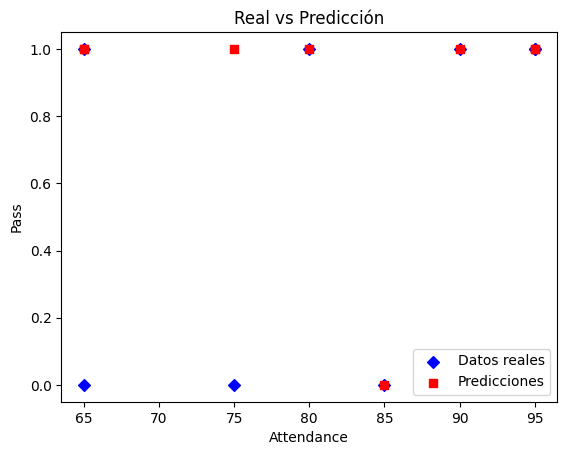

In [40]:
import matplotlib.pyplot as plt

# Crear la gráfica de comparación de puntos
plt.scatter(x['Attendance'], y, color='blue', marker='D', label='Datos reales')  # 'D' para rombos
plt.scatter(pd.concat([pd.DataFrame(X_train['Attendance']),pd.DataFrame(X_test['Attendance'])]), pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_pred)]), color='red', marker='s', label='Predicciones')   # 's' para cuadrados

# Añadir etiquetas y título
plt.xlabel('Attendance')
plt.ylabel('Pass')
plt.title('Real vs Predicción')
plt.legend()

# Mostrar la gráfica
plt.show()

In [41]:
y_pred2 = pd.DataFrame()
y_pred2['Pass'] = model2.predict(np.array(X_test['Homework']).reshape(-1,1))  # Predicción del conjunto de prueba del modelo Homework

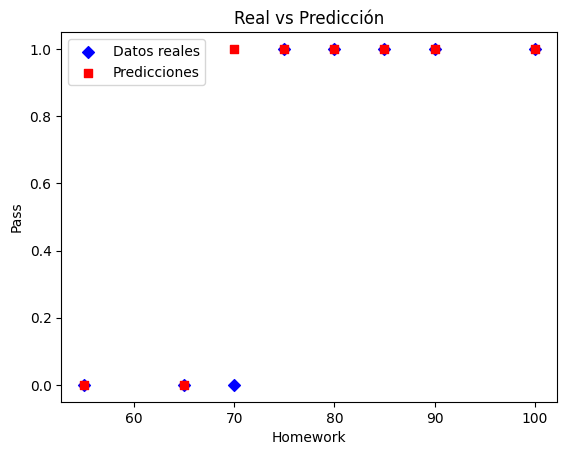

In [42]:
# Crear la gráfica de comparación de puntos
plt.scatter(x['Homework'], y, color='blue', marker='D', label='Datos reales')  # 'D' para rombos
plt.scatter(pd.concat([pd.DataFrame(X_train['Homework']),pd.DataFrame(X_test['Homework'])]), pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_pred2)]), color='red', marker='s', label='Predicciones')   # 's' para cuadrados

# Añadir etiquetas y título
plt.xlabel('Homework')
plt.ylabel('Pass')
plt.title('Real vs Predicción')
plt.legend()

# Mostrar la gráfica
plt.show()

### 5. Calcula el valor de la función de costo para el subconjunto de entrenamiento, y para el subconjunto de prueba.

In [43]:
from sklearn.metrics import log_loss

print("Valor de la función de costo para los datos de entrenamiento del modelo Attendance ", log_loss(y_train, model.predict(np.array(X_train['Attendance']).reshape(-1,1))))
print("Valor de la función de costo para los datos de prueba del modelo Attendance ", log_loss(y_test, y_pred,labels = [0,1]))

Valor de la función de costo para los datos de entrenamiento del modelo Attendance  6.007275564852859
Valor de la función de costo para los datos de prueba del modelo Attendance  36.04365338911715


In [44]:
print("Valor de la función de costo para los datos de entrenamiento del modelo Homework ", log_loss(y_train, model.predict(np.array(X_train['Homework']).reshape(-1,1))))
print("Valor de la función de costo para los datos de prueba del modelo Homework ", log_loss(y_test, y_pred2,labels = [0,1]))

Valor de la función de costo para los datos de entrenamiento del modelo Homework  6.007275564852859
Valor de la función de costo para los datos de prueba del modelo Homework  18.021826694558577


Y además de la función de costo, se calcularán las métricas de matrices de confusión debido a instrucciones del problema.

En este bloque se definen funciones de las métricas de evaluación requeridas en el Challenge.

  - Accuracy: Es la proporción de predicciones correctas (tanto verdaderos positivos como verdaderos negativos) sobre el total de predicciones realizadas.

  - Precision: Es la proporción de predicciones positivas correctas sobre todas las predicciones positivas hechas por el modelo.

  - Recall: Es la proporción de verdaderos positivos identificados correctamente sobre todos los ejemplos que son realmente positivos.

  - F1 Score: Es la media armónica de la precisión y la sensibilidad. Se utiliza cuando se busca un equilibrio entre precisión y sensibilidad, especialmente cuando hay un desbalance de clases.

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Informe de clasificación
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.0
Confusion Matrix:
[[0 2]
 [0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [46]:
# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix:')
print(conf_matrix)

# Informe de clasificación
class_report = classification_report(y_test, y_pred2)
print('Classification Report:')
print(class_report)

Accuracy: 0.5
Confusion Matrix:
[[1 1]
 [0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Como podemos apreciar, el modelo con la variable 'Attendance' no da ninguna predicción correcta, por lo que la exactitud del modelo es del 0%, mientras que el modelo 'Homework' presenta el 50% de exactitud debido a que da 1 de 2 predicciones correctas. Estos puntajes se deben, más que nada, al tamaño de los datos, pues solo se contaron con 6 datos de entrenamiento y 2 de prueba. Estos pocos datos nos llevaron a un gran underfitting, a diferencia del modelo implementado a mano del archivo "Implementacion.ipynb" en el cual la precisión era del 100%, es decir, contemplabamos un overfitting.

### 6. Para facilitar la revisión, entrega dos archivos. El primero debe ser un Jupyter Notebook con todo el desarrollo (código comentado). El segundo debe ser un PDF del Jupyter Notebook. Para esto último, utiliza el comando nbconvert --to html para exportar el notebook a HTML y poder guardar el PDF más fácilmente (https://github.com/jupyter/nbconvert). Ten en cuenta que debes cargar tu directorio de Drive y dar la ruta al archivo, por lo que el comando completo sería:
!jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/archivo.ipynb


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Imple_Scikit.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Imple_Scikit.ipynb to html
[NbConvertApp] Writing 688161 bytes to /content/drive/MyDrive/Colab Notebooks/Imple_Scikit.html


### 7. Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final.